In [1]:
import pandas as pd
import numpy as np
import ast
from typing import Dict, List

pd.set_option("display.precision", 6)
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None

# Предварительная обработка данных

## Предобработка данных о бойцах

### Загрузка данных в датафрейм из csv

In [152]:
fighters_df = pd.read_csv("data/0.fighters_raw.csv", index_col=0)


In [92]:
fighters_df.head()


,armSpan,avgFightTime,city,country,dateOfBirth,disciplines,draws,height,id,knockdownsPerFight,legSwing,looses,methods.looseMethods,methods.looseMethods.DEC,methods.looseMethods.DQ,methods.looseMethods.KO,methods.looseMethods.SUB,methods.winMethods,methods.winMethods.DEC,methods.winMethods.DQ,methods.winMethods.KO,methods.winMethods.SUB,name,photos,rank,sigStrikesAccuracy,significantStrikesDefendPercent,significantStrikesLandPerMinute,significantStrikesMissedPerMinute,submissionAttemptsPer15minutes,takedownsAccuracy,takedownsDefendPercent,takedownsPer15min,timezone,weight,weightCategory.id,weightCategory.name,wins
0,190.50,NaN,Bonnyville,Canada,1991-08-02,[],1,187.96,1,0.00,NaN,6,NaN,5.0,NaN,1.0,NaN,NaN,6.0,NaN,10.0,2.0,Tanner Boser,[{'url': 'http://bet2face.com/uploads/images/f...,16,49.0,63.0,4.17,3.23,NaN,NaN,100.0,NaN,America/Edmonton,115.67,9,Тяжелый вес,17
1,190.50,NaN,NaN,Brazil,1989-06-23,[],0,190.50,2,0.00,NaN,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,Giacomo Lemos,[{'url': 'http://bet2face.com/uploads/images/f...,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,America/Sao_Paulo,112.04,9,Тяжелый вес,6
2,193.04,11:41,Makhachkala,Dagestan,1981-09-02,[],0,190.50,3,0.21,105.41,5,NaN,1.0,NaN,3.0,1.0,NaN,7.0,NaN,9.0,3.0,Shamil Abdurakhimov,[{'url': 'http://bet2face.com/uploads/images/f...,16,44.0,58.0,2.45,2.45,0.2,24.0,47.0,1.23,Europe/Moscow,106.59,9,Тяжелый вес,20
3,187.96,15:00,Manaus,Brazil,1992-12-24,[],0,182.88,4,0.00,NaN,5,NaN,2.0,NaN,3.0,NaN,NaN,1.0,NaN,4.0,9.0,Klidson Abreu,[{'url': 'http://bet2face.com/uploads/images/f...,16,40.0,55.0,2.05,2.90,NaN,20.0,80.0,0.64,America/Manaus,92.99,8,Полутяжелый вес,15
4,190.50,13:05,Ikuno,Japan,1975-07-29,[],0,177.80,5,0.00,106.68,6,NaN,4.0,NaN,2.0,1.0,NaN,2.0,NaN,4.0,7.0,Yoshihiro Akiyama,[{'url': 'http://bet2face.com/uploads/images/f...,16,41.0,57.0,3.10,3.62,1.0,67.0,92.0,2.29,Asia/Tokyo,77.11,6,Полусредний вес,14


In [40]:
fighters_df.shape

(3669, 38)

In [4]:
fighters_df.describe()

,armSpan,draws,height,id,knockdownsPerFight,legSwing,looses,methods.looseMethods.DEC,methods.looseMethods.DQ,methods.looseMethods.KO,methods.looseMethods.SUB,methods.winMethods.DEC,methods.winMethods.DQ,methods.winMethods.KO,methods.winMethods.SUB,rank,sigStrikesAccuracy,significantStrikesDefendPercent,significantStrikesLandPerMinute,significantStrikesMissedPerMinute,submissionAttemptsPer15minutes,takedownsAccuracy,takedownsDefendPercent,takedownsPer15min,weight,weightCategory.id,wins
count,1727.000000,3669.000000,3335.000000,3669.000000,1937.000000,774.000000,3669.000000,2148.000000,21.0,2141.000000,1870.000000,2162.000000,20.000000,2285.000000,2189.000000,3669.000000,2685.000000,2745.000000,2686.000000,2750.000000,1439.000000,1881.000000,2086.000000,1882.000000,3530.000000,3669.00000,3669.000000
mean,182.566925,0.261924,178.680006,1840.017443,0.271182,101.829238,4.921777,3.144320,1.0,2.531060,2.507487,4.551804,1.050000,5.268271,5.618090,15.965658,42.995903,52.226594,2.842651,3.615407,1.513586,46.839447,61.162033,2.163587,78.472513,7.30199,11.216135
std,12.444285,0.816489,9.924185,1062.215404,0.761949,7.562750,4.605558,2.591525,0.0,2.075579,2.774897,3.597566,0.223607,4.341817,5.509868,0.626059,12.848582,12.590417,1.794512,2.727638,2.087365,24.202004,22.783532,2.067852,18.186395,3.12400,8.611220
min,152.400000,0.000000,152.400000,1.000000,0.000000,39.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,4.000000,0.060000,0.130000,0.100000,4.000000,5.000000,0.080000,47.630000,2.00000,0.000000
25%,175.260000,0.000000,172.720000,922.000000,0.000000,96.520000,2.000000,1.000000,1.0,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,16.000000,35.000000,45.000000,1.620000,2.200000,0.500000,30.000000,46.000000,0.940000,65.770000,5.00000,6.000000
50%,182.880000,0.000000,177.800000,1839.000000,0.000000,101.600000,4.000000,2.000000,1.0,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,16.000000,42.000000,54.000000,2.610000,3.080000,0.900000,42.000000,61.000000,1.690000,77.110000,7.00000,10.000000
75%,190.500000,0.000000,185.420000,2760.000000,0.370000,106.680000,7.000000,4.000000,1.0,3.000000,3.000000,6.000000,1.000000,7.000000,7.000000,16.000000,50.000000,60.000000,3.670000,4.277500,1.700000,57.000000,77.000000,2.800000,83.910000,9.00000,15.000000
max,458.470000,11.000000,445.260000,3677.000000,19.570000,200.660000,74.000000,20.000000,1.0,27.000000,51.000000,30.000000,2.000000,83.000000,127.000000,16.000000,100.000000,100.000000,23.410000,52.500000,21.900000,100.000000,100.000000,32.140000,349.270000,14.00000,127.000000


In [19]:
(fighters_df.isna().sum()/fighters_df.shape[0]*100).round(0)

armSpan                              53.0
avgFightTime                         53.0
city                                 63.0
country                              33.0
dateOfBirth                           2.0
disciplines                           0.0
draws                                 0.0
height                                9.0
id                                    0.0
knockdownsPerFight                   47.0
legSwing                             79.0
looses                                0.0
methods.looseMethods                 80.0
methods.looseMethods.DEC             41.0
methods.looseMethods.DQ              99.0
methods.looseMethods.KO              42.0
methods.looseMethods.SUB             49.0
methods.winMethods                   71.0
methods.winMethods.DEC               41.0
methods.winMethods.DQ                99.0
methods.winMethods.KO                38.0
methods.winMethods.SUB               40.0
name                                  0.0
photos                            

In [153]:
fighters_cols = [
    "id",
    "name",
    "weight",
    "height",
    "armSpan",
    "weightCategory.id",
    "weightCategory.name",
    "dateOfBirth",
    "country",
    "city",
    "timezone"
]

In [154]:
fighters_df["dateOfBirth"] = pd.to_datetime(fighters_df["dateOfBirth"])

In [155]:

fighters_df = fighters_df[fighters_cols]
fighters_df.set_index("id", inplace=True)
fighters_df.head()

,name,weight,height,armSpan,weightCategory.id,weightCategory.name,dateOfBirth,country,city,timezone
id,,,,,,,,,,
1,Tanner Boser,115.67,187.96,190.50,9,Тяжелый вес,1991-08-02,Canada,Bonnyville,America/Edmonton
2,Giacomo Lemos,112.04,190.50,190.50,9,Тяжелый вес,1989-06-23,Brazil,NaN,America/Sao_Paulo
3,Shamil Abdurakhimov,106.59,190.50,193.04,9,Тяжелый вес,1981-09-02,Dagestan,Makhachkala,Europe/Moscow
4,Klidson Abreu,92.99,182.88,187.96,8,Полутяжелый вес,1992-12-24,Brazil,Manaus,America/Manaus
5,Yoshihiro Akiyama,77.11,177.80,190.50,6,Полусредний вес,1975-07-29,Japan,Ikuno,Asia/Tokyo


In [45]:
fighters_df.shape

(3669, 8)

In [150]:
fighters_extra =pd.read_csv('data.csv', usecols=['R_fighter', 'R_Stance', 'R_Reach_cms'])

In [151]:
fighters_extra.head()

,R_fighter,R_Stance,R_Reach_cms
0,Adrian Yanez,Orthodox,177.80
1,Trevin Giles,Orthodox,187.96
2,Tai Tuivasa,Southpaw,190.50
3,Cheyanne Buys,Switch,160.02
4,Marion Reneau,Orthodox,172.72


In [78]:
# fighters_df.merge(fighters_extra, how='left', left_on='name', right_on='R_fighter' )

,name,height,armSpan,weightCategory.id,dateOfBirth,country,city,timezone,R_fighter,R_Stance,R_Reach_cms
0,Tanner Boser,187.96,190.50,9,1991-08-02,Canada,Bonnyville,America/Edmonton,Tanner Boser,Orthodox,190.50
1,Giacomo Lemos,190.50,190.50,9,1989-06-23,Brazil,NaN,America/Sao_Paulo,NaN,NaN,NaN
2,Shamil Abdurakhimov,190.50,193.04,9,1981-09-02,Dagestan,Makhachkala,Europe/Moscow,Shamil Abdurakhimov,Orthodox,193.04
3,Shamil Abdurakhimov,190.50,193.04,9,1981-09-02,Dagestan,Makhachkala,Europe/Moscow,Shamil Abdurakhimov,Orthodox,193.04
4,Klidson Abreu,182.88,187.96,8,1992-12-24,Brazil,Manaus,America/Manaus,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8089,Rinat Fakhretdinov,182.88,NaN,14,1991-09-28,NaN,NaN,NaN,NaN,NaN,NaN
8090,Carlston Harris,182.88,NaN,14,1987-07-09,NaN,NaN,NaN,NaN,NaN,NaN
8091,Askar Askar,170.18,NaN,14,1994-08-19,NaN,NaN,NaN,NaN,NaN,NaN
8092,Patrick Sabatini,175.26,NaN,14,1990-11-09,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# pd.merge(fighters_df, fighters_extra, left_index=True, right_index=True)

,name,height,armSpan,weightCategory.id,dateOfBirth,country,city,timezone,R_fighter,R_Stance,R_Reach_cms
1,Tanner Boser,187.96,190.50,9,1991-08-02,Canada,Bonnyville,America/Edmonton,Trevin Giles,Orthodox,187.96
2,Giacomo Lemos,190.50,190.50,9,1989-06-23,Brazil,NaN,America/Sao_Paulo,Tai Tuivasa,Southpaw,190.50
3,Shamil Abdurakhimov,190.50,193.04,9,1981-09-02,Dagestan,Makhachkala,Europe/Moscow,Cheyanne Buys,Switch,160.02
4,Klidson Abreu,182.88,187.96,8,1992-12-24,Brazil,Manaus,America/Manaus,Marion Reneau,Orthodox,172.72
5,Yoshihiro Akiyama,177.80,190.50,6,1975-07-29,Japan,Ikuno,Asia/Tokyo,Leonardo Santos,Orthodox,190.50
...,...,...,...,...,...,...,...,...,...,...,...
3673,Rinat Fakhretdinov,182.88,NaN,14,1991-09-28,NaN,NaN,NaN,Viscardi Andrade,Orthodox,190.50
3674,Carlston Harris,182.88,NaN,14,1987-07-09,NaN,NaN,NaN,Rani Yahya,Orthodox,170.18
3675,Askar Askar,170.18,NaN,14,1994-08-19,NaN,NaN,NaN,Yves Edwards,Southpaw,185.42
3676,Patrick Sabatini,175.26,NaN,14,1990-11-09,NaN,NaN,NaN,Demetrious Johnson,Orthodox,167.64


In [51]:
fighters_df.shape

(5896, 11)

### Исправляем поле `country` для бойцов из США
У некоторых бойцов из США в поле `country` указан штат, а не страна. \
Также заменяем написание `United States` на `USA`, чтобы название соответствовало данным из таблицы с боями.

In [156]:
usa_state_names = [
    "Alaska",
    "Alabama",
    "Arkansas",
    "American Samoa",
    "Arizona",
    "California",
    "Colorado",
    "Connecticut",
    "District ",
    "of Columbia",
    "Delaware",
    "Florida",
    "Georgia",
    "Guam",
    "Hawaii",
    "Iowa",
    "Idaho",
    "Illinois",
    "Indiana",
    "Kansas",
    "Kentucky",
    "Louisiana",
    "Massachusetts",
    "Maryland",
    "Maine",
    "Michigan",
    "Minnesota",
    "Missouri",
    "Mississippi",
    "Montana",
    "North Carolina",
    "North Dakota",
    "Nebraska",
    "New Hampshire",
    "New Jersey",
    "New Mexico",
    "Nevada",
    "New York",
    "Ohio",
    "Oklahoma",
    "Oregon",
    "Pennsylvania",
    "Puerto Rico",
    "Rhode Island",
    "South Carolina",
    "South Dakota",
    "Tennessee",
    "Texas",
    "Utah",
    "Virginia",
    "Virgin Islands",
    "Vermont",
    "Washington",
    "Wisconsin",
    "West Virginia",
    "Wyoming",
]
fighters_df.loc[fighters_df["country"] == "United States", "country"] = "USA"
fighters_df.loc[fighters_df["country"].isin(usa_state_names), "country"] = "USA"
fighters_df.head()

,name,weight,height,armSpan,weightCategory.id,weightCategory.name,dateOfBirth,country,city,timezone
id,,,,,,,,,,
1,Tanner Boser,115.67,187.96,190.50,9,Тяжелый вес,1991-08-02,Canada,Bonnyville,America/Edmonton
2,Giacomo Lemos,112.04,190.50,190.50,9,Тяжелый вес,1989-06-23,Brazil,NaN,America/Sao_Paulo
3,Shamil Abdurakhimov,106.59,190.50,193.04,9,Тяжелый вес,1981-09-02,Dagestan,Makhachkala,Europe/Moscow
4,Klidson Abreu,92.99,182.88,187.96,8,Полутяжелый вес,1992-12-24,Brazil,Manaus,America/Manaus
5,Yoshihiro Akiyama,77.11,177.80,190.50,6,Полусредний вес,1975-07-29,Japan,Ikuno,Asia/Tokyo


### Убираем строки с выбросами роста

In [157]:
fighters_df = fighters_df[fighters_df['height'] < 230]
fighters_df = fighters_df[fighters_df['height'] > 145]

### Находим все возможные весовые категории

In [158]:
avg_weight_in_weight_category = fighters_df.groupby(by="weightCategory.id").mean()['weight']
avg_weight_in_weight_category

weightCategory.id
2      57.063040
3      61.242267
4      64.205865
5      70.417324
6      72.343374
7      80.690843
8      92.152333
9     108.277844
10     52.431429
11     56.808095
12     61.131190
13     63.253333
14     90.951853
Name: weight, dtype: float64

### Замена пустых значений роста на размах рук

In [159]:
def replace_null_height_to_arm_span(row):
    if np.isnan(row['height']) and row['armSpan']:
        arm_span = row['armSpan']
        return arm_span
    return row['height']

fighters_df['height'] = fighters_df.apply(
    lambda row: replace_null_height_to_arm_span(row),
    axis=1
)

### Замена пустых значений размаха рук на рост

In [160]:
def replace_null_arm_span_to_height(row):
    if np.isnan(row['armSpan']) and row['height']:
        height = row['height']
        return height
    return row['armSpan']

fighters_df['armSpan'] = fighters_df.apply(
    lambda row: replace_null_arm_span_to_height(row),
    axis=1
)

## Предобработка данных о боях

### Загружаем данные о боях в датафрейм из csv

In [161]:
events_df = pd.read_csv("data/0.events_raw.csv", index_col=0)
events_df["eventDate.date"] = pd.to_datetime(events_df["eventDate.date"])
events_df.set_index("id", inplace=True)
events_df.head(5)

,avgOdds,city,completed,country,duration,eventDate.date,eventDate.timezone,eventDate.timezone_type,fighterId_1,fighterId_2,fighters,link,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId
id,,,,,,,,,,,,,,,,,,,
5201,[],Denver,True,USA,104.0,1993-11-12,Europe/Berlin,3,1646,1923,"[{'fighterId': 1646, 'fightStats': {'hitsTotal...",http://www.ufcstats.com/fight-details/64139d1d...,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0
5202,[],Denver,True,USA,52.0,1993-11-12,Europe/Berlin,3,1777,1883,"[{'fighterId': 1777, 'fightStats': {'hitsTotal...",http://www.ufcstats.com/fight-details/00b07967...,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0
5203,[],Denver,True,USA,59.0,1993-11-12,Europe/Berlin,3,1908,1923,"[{'fighterId': 1908, 'fightStats': {'hitsTotal...",http://www.ufcstats.com/fight-details/ac7ca2ec...,UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0
5204,[],Denver,True,USA,57.0,1993-11-12,Europe/Berlin,3,1631,1646,"[{'fighterId': 1631, 'fightStats': {'hitsTotal...",http://www.ufcstats.com/fight-details/ffd16691...,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0
5205,[],Denver,True,USA,138.0,1993-11-12,Europe/Berlin,3,1646,1924,"[{'fighterId': 1646, 'fightStats': {'hitsTotal...",http://www.ufcstats.com/fight-details/cecdc0da...,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0


### Убираем строки с незавершенными боями и боями, где отсутствует `winnerId`

In [162]:
events_df.drop(events_df[events_df["completed"] == False].index, inplace=True)
events_df.drop(events_df[events_df["winnerId"].isna()].index, inplace=True)

### В строках, где `winnerId` не совпадает с айди ни одного из бойцов, ставим `winnerId` = 0 (ничья)

In [163]:
events_df.loc[
    (events_df["winnerId"] != events_df["fighterId_1"])
    & (events_df["winnerId"] != events_df["fighterId_2"]),
    "winnerId",
] = 0

### Удаляем лишние колонки

In [164]:
events_df.drop(
    columns=["completed", "eventDate.timezone_type", "link"],
    inplace=True,
)
events_df.head(15)

,avgOdds,city,country,duration,eventDate.date,eventDate.timezone,fighterId_1,fighterId_2,fighters,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId
id,,,,,,,,,,,,,,,,
5201,[],Denver,USA,104.0,1993-11-12,Europe/Berlin,1646,1923,"[{'fighterId': 1646, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0
5202,[],Denver,USA,52.0,1993-11-12,Europe/Berlin,1777,1883,"[{'fighterId': 1777, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0
5203,[],Denver,USA,59.0,1993-11-12,Europe/Berlin,1908,1923,"[{'fighterId': 1908, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0
5204,[],Denver,USA,57.0,1993-11-12,Europe/Berlin,1631,1646,"[{'fighterId': 1631, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0
5205,[],Denver,USA,138.0,1993-11-12,Europe/Berlin,1646,1924,"[{'fighterId': 1646, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0
5206,[],Denver,USA,109.0,1993-11-12,Europe/Berlin,1631,1895,"[{'fighterId': 1631, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1631.0
5207,[],Denver,USA,260.0,1993-11-12,Europe/Berlin,1870,1908,"[{'fighterId': 1870, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1908.0
5208,[],Denver,USA,26.0,1993-11-12,Europe/Berlin,1923,1925,"[{'fighterId': 1923, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0
5186,[],Denver,USA,77.0,1994-03-11,Europe/Berlin,1646,1895,"[{'fighterId': 1646, 'fightStats': {'hitsTotal...",UFC 2,1.0,America/Denver,7,Средний вес,['KO'],1646.0


### Извлекаем данные из колонок `avgOdds` и `fighters`

### Парсим колонку `avgOdds`

In [165]:
def parse_odds(row: pd.Series) -> pd.Series:
    """
    Parse 'avgOdds' column.
    :param row: Row of the events dataframe.
    :return: pd.Series with odds for the 1st and the 2nd fighters.
    """
    avg_odds = row["avgOdds"]
    if avg_odds == "[]" or avg_odds == np.nan:
        return pd.Series([np.nan] * 2)
    avg_odds = ast.literal_eval(avg_odds)
    if avg_odds[0]["fighterId"] == row["fighterId_1"]:
        return pd.Series([f.get("value", np.nan) for f in avg_odds])
    else:
        return pd.Series([f.get("value", np.nan) for f in reversed(avg_odds)])

In [166]:
events_df[["f1_odds", "f2_odds"]] = events_df[
    ["avgOdds", "fighterId_1", "fighterId_2"]
].apply(lambda row: parse_odds(row), axis=1)
events_df.drop(columns="avgOdds", inplace=True)
events_df.head(15)

,city,country,duration,eventDate.date,eventDate.timezone,fighterId_1,fighterId_2,fighters,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds
id,,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,Europe/Berlin,1646,1923,"[{'fighterId': 1646, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN
5202,Denver,USA,52.0,1993-11-12,Europe/Berlin,1777,1883,"[{'fighterId': 1777, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,NaN,NaN
5203,Denver,USA,59.0,1993-11-12,Europe/Berlin,1908,1923,"[{'fighterId': 1908, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN
5204,Denver,USA,57.0,1993-11-12,Europe/Berlin,1631,1646,"[{'fighterId': 1631, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0,NaN,NaN
5205,Denver,USA,138.0,1993-11-12,Europe/Berlin,1646,1924,"[{'fighterId': 1646, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN
5206,Denver,USA,109.0,1993-11-12,Europe/Berlin,1631,1895,"[{'fighterId': 1631, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1631.0,NaN,NaN
5207,Denver,USA,260.0,1993-11-12,Europe/Berlin,1870,1908,"[{'fighterId': 1870, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1908.0,NaN,NaN
5208,Denver,USA,26.0,1993-11-12,Europe/Berlin,1923,1925,"[{'fighterId': 1923, 'fightStats': {'hitsTotal...",UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN
5186,Denver,USA,77.0,1994-03-11,Europe/Berlin,1646,1895,"[{'fighterId': 1646, 'fightStats': {'hitsTotal...",UFC 2,1.0,America/Denver,7,Средний вес,['KO'],1646.0,NaN,NaN



#### Парсим колонку `fighters`

In [167]:
fighter_stats_keys = [
    "hitsTotal",
    "hitsSuccessful",
    "takedownTotal",
    "takedownSuccessful",
    "submissionAttempts",
    "takeovers",
    "accentedHitsTotal",
    "accentedHitsSuccessful",
    "knockdowns",
    "protectionPassage",
    "hitsHeadTotal",
    "hitsHeadSuccessful",
    "hitsBodyTotal",
    "hitsBodySuccessful",
    "hitsLegsTotal",
    "hitsLegsSuccessful",
    "accentedHitsPositionDistanceTotal",
    "accentedHitsPositionDistanceSuccessful",
    "accentedHitsPositionClinchTotal",
    "accentedHitsPositionClinchSuccessful",
    "accentedHitsPositionParterTotal",
    "accentedHitsPositionParterSuccessful",
]


def get_fighter_stats_cols() -> List[str]:
    """
    Get list of fight stats column names for each fighter.
    :return: List of column names with 'f1_' prefix
    for the first fighter and 'f2_' prefix for the second.
    """
    fighter_stats_cols = []
    for i in range(1, 3):
        for k in fighter_stats_keys:
            fighter_stats_cols.append(f"f{i}_{k}")
    return fighter_stats_cols


def sum_round_stats(stats: List[Dict[str, int]]) -> List[int]:
    """
    Sum stats for a fighter for all rounds of a fight.
    :param stats: List with stats from object of 'fighters' column.
    :return: Stats for all rounds for a fighter as a list.
    """
    if len(stats) == 0:
        return [np.nan for _ in range(len(fighter_stats_keys))]
    res = {k: 0 for k in fighter_stats_keys}
    for i in stats:
        for k in res:
            res[k] = i.get(k, 0)
    return list(res.values())


def parse_fight_data(row: pd.Series) -> pd.Series:
    """
    Parse 'fighters' column.
    :param row: Row of the events dataframe.
    :return: pd.Series with stats for both fighters.
    """
    fighters = row["fighters"]
    if fighters == "[]" or fighters == np.nan:
        return pd.Series([np.nan for _ in range(len(fighter_stats_keys))])
    cols = []
    fighters = ast.literal_eval(fighters)
    if fighters[0]["fighterId"] == row["fighterId_2"]:
        fighters = reversed(fighters)
    for f in fighters:
        cols.extend(sum_round_stats(f["roundStats"]))
    return pd.Series(cols)

In [168]:
events_df[get_fighter_stats_cols()] = events_df[
    ["fighters", "fighterId_1", "fighterId_2"]
].apply(lambda row: parse_fight_data(row), axis=1)
events_df.drop(columns="fighters", inplace=True)
events_df.head(5)

,city,country,duration,eventDate.date,eventDate.timezone,fighterId_1,fighterId_2,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds,f1_hitsTotal,f1_hitsSuccessful,f1_takedownTotal,f1_takedownSuccessful,f1_submissionAttempts,f1_takeovers,f1_accentedHitsTotal,f1_accentedHitsSuccessful,f1_knockdowns,f1_protectionPassage,f1_hitsHeadTotal,f1_hitsHeadSuccessful,f1_hitsBodyTotal,f1_hitsBodySuccessful,f1_hitsLegsTotal,f1_hitsLegsSuccessful,f1_accentedHitsPositionDistanceTotal,f1_accentedHitsPositionDistanceSuccessful,f1_accentedHitsPositionClinchTotal,f1_accentedHitsPositionClinchSuccessful,f1_accentedHitsPositionParterTotal,f1_accentedHitsPositionParterSuccessful,f2_hitsTotal,f2_hitsSuccessful,f2_takedownTotal,f2_takedownSuccessful,f2_submissionAttempts,f2_takeovers,f2_accentedHitsTotal,f2_accentedHitsSuccessful,f2_knockdowns,f2_protectionPassage,f2_hitsHeadTotal,f2_hitsHeadSuccessful,f2_hitsBodyTotal,f2_hitsBodySuccessful,f2_hitsLegsTotal,f2_hitsLegsSuccessful,f2_accentedHitsPositionDistanceTotal,f2_accentedHitsPositionDistanceSuccessful,f2_accentedHitsPositionClinchTotal,f2_accentedHitsPositionClinchSuccessful,f2_accentedHitsPositionParterTotal,f2_accentedHitsPositionParterSuccessful
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,Europe/Berlin,1646,1923,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,4.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5202,Denver,USA,52.0,1993-11-12,Europe/Berlin,1777,1883,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,NaN,NaN,9.0,3.0,2.0,1.0,1.0,0.0,9.0,3.0,0.0,1.0,7.0,3.0,1.0,0.0,1.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0
5203,Denver,USA,59.0,1993-11-12,Europe/Berlin,1908,1923,UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,13.0,7.0,1.0,1.0,3.0,3.0,8.0,5.0,0.0,0.0,9.0,6.0
5204,Denver,USA,57.0,1993-11-12,Europe/Berlin,1631,1646,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5205,Denver,USA,138.0,1993-11-12,Europe/Berlin,1646,1924,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,7.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Добавляем данные о бойцах в датафрейм с боями

In [169]:
fighter_data_cols = fighters_df.drop(
    columns=["weightCategory.id", "weightCategory.name"]  # add "name" later
).columns
events_df = events_df.join(
    fighters_df[fighter_data_cols].add_prefix("f1_"), on="fighterId_1"
)
events_df = events_df.join(
    fighters_df[fighter_data_cols].add_prefix("f2_"), on="fighterId_2"
)
events_df.head(5)

,city,country,duration,eventDate.date,eventDate.timezone,fighterId_1,fighterId_2,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds,f1_hitsTotal,f1_hitsSuccessful,f1_takedownTotal,f1_takedownSuccessful,f1_submissionAttempts,f1_takeovers,f1_accentedHitsTotal,f1_accentedHitsSuccessful,f1_knockdowns,f1_protectionPassage,f1_hitsHeadTotal,f1_hitsHeadSuccessful,f1_hitsBodyTotal,f1_hitsBodySuccessful,f1_hitsLegsTotal,f1_hitsLegsSuccessful,f1_accentedHitsPositionDistanceTotal,f1_accentedHitsPositionDistanceSuccessful,f1_accentedHitsPositionClinchTotal,f1_accentedHitsPositionClinchSuccessful,f1_accentedHitsPositionParterTotal,f1_accentedHitsPositionParterSuccessful,f2_hitsTotal,f2_hitsSuccessful,f2_takedownTotal,f2_takedownSuccessful,f2_submissionAttempts,f2_takeovers,f2_accentedHitsTotal,f2_accentedHitsSuccessful,f2_knockdowns,f2_protectionPassage,f2_hitsHeadTotal,f2_hitsHeadSuccessful,f2_hitsBodyTotal,f2_hitsBodySuccessful,f2_hitsLegsTotal,f2_hitsLegsSuccessful,f2_accentedHitsPositionDistanceTotal,f2_accentedHitsPositionDistanceSuccessful,f2_accentedHitsPositionClinchTotal,f2_accentedHitsPositionClinchSuccessful,f2_accentedHitsPositionParterTotal,f2_accentedHitsPositionParterSuccessful,f1_name,f1_weight,f1_height,f1_armSpan,f1_dateOfBirth,f1_country,f1_city,f1_timezone,f2_name,f2_weight,f2_height,f2_armSpan,f2_dateOfBirth,f2_country,f2_city,f2_timezone
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,Europe/Berlin,1646,1923,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,4.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Gerard Gordeau,97.98,195.58,195.58,1959-03-30,Netherlands,NaN,Europe/Amsterdam
5202,Denver,USA,52.0,1993-11-12,Europe/Berlin,1777,1883,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,NaN,NaN,9.0,3.0,2.0,1.0,1.0,0.0,9.0,3.0,0.0,1.0,7.0,3.0,1.0,0.0,1.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,Jason DeLucia,86.18,180.34,180.34,1969-07-24,USA,NaN,America/New_York,Trent Jenkins,83.91,187.96,187.96,1970-01-01,USA,NaN,America/New_York
5203,Denver,USA,59.0,1993-11-12,Europe/Berlin,1908,1923,UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,13.0,7.0,1.0,1.0,3.0,3.0,8.0,5.0,0.0,0.0,9.0,6.0,Kevin Rosier,124.74,193.04,193.04,1970-01-01,USA,NaN,America/New_York,Gerard Gordeau,97.98,195.58,195.58,1959-03-30,Netherlands,NaN,Europe/Amsterdam
5204,Denver,USA,57.0,1993-11-12,Europe/Berlin,1631,1646,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ken Shamrock,92.99,185.42,182.88,1964-02-11,USA,Macon,America/New_York,Royce Gracie,79.38,185.42,185.42,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo
5205,Denver,USA,138.0,1993-11-12,Europe/Berlin,1646,1924,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,7.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Art Jimmerson,88.90,185.42,185.42,1963-08-04,USA,NaN,America/New_York


### Добавляем признак `age`
`age` - количество полных лет бойца на момент боя

In [170]:
def add_age(row: pd.Series) -> pd.Series:
    """
    Add age for both fighters.
    :param row: Row of the events dataframe.
    :return: pd.Series with age of fighters in years.
    """
    result = []
    for prefix in ["f1_", "f2_"]:
        try:
            age = row["eventDate.date"].year - row[prefix + "dateOfBirth"].year
        except Exception:
            age = np.nan
        result.append(age)
    return pd.Series(result)

In [171]:
events_df[["f1_age", "f2_age"]] = events_df[
    ["eventDate.date", "f1_dateOfBirth", "f2_dateOfBirth"]
].apply(lambda row: add_age(row), axis=1)
events_df.head(5)

,city,country,duration,eventDate.date,eventDate.timezone,fighterId_1,fighterId_2,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds,f1_hitsTotal,f1_hitsSuccessful,f1_takedownTotal,f1_takedownSuccessful,f1_submissionAttempts,f1_takeovers,f1_accentedHitsTotal,f1_accentedHitsSuccessful,f1_knockdowns,f1_protectionPassage,f1_hitsHeadTotal,f1_hitsHeadSuccessful,f1_hitsBodyTotal,f1_hitsBodySuccessful,f1_hitsLegsTotal,f1_hitsLegsSuccessful,f1_accentedHitsPositionDistanceTotal,f1_accentedHitsPositionDistanceSuccessful,f1_accentedHitsPositionClinchTotal,f1_accentedHitsPositionClinchSuccessful,f1_accentedHitsPositionParterTotal,f1_accentedHitsPositionParterSuccessful,f2_hitsTotal,f2_hitsSuccessful,f2_takedownTotal,f2_takedownSuccessful,f2_submissionAttempts,f2_takeovers,f2_accentedHitsTotal,f2_accentedHitsSuccessful,f2_knockdowns,f2_protectionPassage,f2_hitsHeadTotal,f2_hitsHeadSuccessful,f2_hitsBodyTotal,f2_hitsBodySuccessful,f2_hitsLegsTotal,f2_hitsLegsSuccessful,f2_accentedHitsPositionDistanceTotal,f2_accentedHitsPositionDistanceSuccessful,f2_accentedHitsPositionClinchTotal,f2_accentedHitsPositionClinchSuccessful,f2_accentedHitsPositionParterTotal,f2_accentedHitsPositionParterSuccessful,f1_name,f1_weight,f1_height,f1_armSpan,f1_dateOfBirth,f1_country,f1_city,f1_timezone,f2_name,f2_weight,f2_height,f2_armSpan,f2_dateOfBirth,f2_country,f2_city,f2_timezone,f1_age,f2_age
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,Europe/Berlin,1646,1923,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,4.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Gerard Gordeau,97.98,195.58,195.58,1959-03-30,Netherlands,NaN,Europe/Amsterdam,27.0,34.0
5202,Denver,USA,52.0,1993-11-12,Europe/Berlin,1777,1883,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,NaN,NaN,9.0,3.0,2.0,1.0,1.0,0.0,9.0,3.0,0.0,1.0,7.0,3.0,1.0,0.0,1.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,Jason DeLucia,86.18,180.34,180.34,1969-07-24,USA,NaN,America/New_York,Trent Jenkins,83.91,187.96,187.96,1970-01-01,USA,NaN,America/New_York,24.0,23.0
5203,Denver,USA,59.0,1993-11-12,Europe/Berlin,1908,1923,UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,13.0,7.0,1.0,1.0,3.0,3.0,8.0,5.0,0.0,0.0,9.0,6.0,Kevin Rosier,124.74,193.04,193.04,1970-01-01,USA,NaN,America/New_York,Gerard Gordeau,97.98,195.58,195.58,1959-03-30,Netherlands,NaN,Europe/Amsterdam,23.0,34.0
5204,Denver,USA,57.0,1993-11-12,Europe/Berlin,1631,1646,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ken Shamrock,92.99,185.42,182.88,1964-02-11,USA,Macon,America/New_York,Royce Gracie,79.38,185.42,185.42,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,29.0,27.0
5205,Denver,USA,138.0,1993-11-12,Europe/Berlin,1646,1924,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,7.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Art Jimmerson,88.90,185.42,185.42,1963-08-04,USA,NaN,America/New_York,27.0,30.0


### Добавляем признаки `isHomeCity`, `isHomeCountry`, `isHomeTimezone`
Возможные значения переменных: 0 и 1 \
`isHomeCity` - боец дерется в родном городе \
`isHomeCountry` - боец дерется в родной стране \
`isHomeTimezone` - боец дерется в своем часовом поясе

In [172]:
def get_territorial_cols() -> List[str]:
    """
    Get list of territorial column names for each fighter.
    :return: List of column names with 'f1_' prefix
    for the first fighter and 'f2_' prefix for the second.
    """
    result = []
    for prefix in ["f1_", "f2_"]:
        for key in ["isHomeCity", "isHomeCountry", "isHomeTimezone"]:
            result.append(prefix + key)
    return result


def fill_territorial_cols(row: pd.Series) -> pd.Series:
    """
    Add binary features 'isHomeCity', 'isHomeCountry', 'isHomeTimezone'
    for each fighter.
    :param row: Row of the events dataframe.
    :return: pd.Series with features for both fighters.
    """
    result = []
    for prefix in ["f1_", "f2_"]:
        for key in ["city", "country", "timezone"]:
            result.append(int(row[key] == row[prefix + key]))
    return pd.Series(result)

In [173]:
events_df[get_territorial_cols()] = events_df.apply(
    lambda row: fill_territorial_cols(row), axis=1
)
events_df.head()

,city,country,duration,eventDate.date,eventDate.timezone,fighterId_1,fighterId_2,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds,f1_hitsTotal,f1_hitsSuccessful,f1_takedownTotal,f1_takedownSuccessful,f1_submissionAttempts,f1_takeovers,f1_accentedHitsTotal,f1_accentedHitsSuccessful,f1_knockdowns,f1_protectionPassage,f1_hitsHeadTotal,f1_hitsHeadSuccessful,f1_hitsBodyTotal,f1_hitsBodySuccessful,f1_hitsLegsTotal,f1_hitsLegsSuccessful,f1_accentedHitsPositionDistanceTotal,f1_accentedHitsPositionDistanceSuccessful,f1_accentedHitsPositionClinchTotal,f1_accentedHitsPositionClinchSuccessful,f1_accentedHitsPositionParterTotal,f1_accentedHitsPositionParterSuccessful,f2_hitsTotal,f2_hitsSuccessful,f2_takedownTotal,f2_takedownSuccessful,f2_submissionAttempts,f2_takeovers,f2_accentedHitsTotal,f2_accentedHitsSuccessful,f2_knockdowns,f2_protectionPassage,f2_hitsHeadTotal,f2_hitsHeadSuccessful,f2_hitsBodyTotal,f2_hitsBodySuccessful,f2_hitsLegsTotal,f2_hitsLegsSuccessful,f2_accentedHitsPositionDistanceTotal,f2_accentedHitsPositionDistanceSuccessful,f2_accentedHitsPositionClinchTotal,f2_accentedHitsPositionClinchSuccessful,f2_accentedHitsPositionParterTotal,f2_accentedHitsPositionParterSuccessful,f1_name,f1_weight,f1_height,f1_armSpan,f1_dateOfBirth,f1_country,f1_city,f1_timezone,f2_name,f2_weight,f2_height,f2_armSpan,f2_dateOfBirth,f2_country,f2_city,f2_timezone,f1_age,f2_age,f1_isHomeCity,f1_isHomeCountry,f1_isHomeTimezone,f2_isHomeCity,f2_isHomeCountry,f2_isHomeTimezone
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,Europe/Berlin,1646,1923,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,4.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Gerard Gordeau,97.98,195.58,195.58,1959-03-30,Netherlands,NaN,Europe/Amsterdam,27.0,34.0,0,0,0,0,0,0
5202,Denver,USA,52.0,1993-11-12,Europe/Berlin,1777,1883,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,NaN,NaN,9.0,3.0,2.0,1.0,1.0,0.0,9.0,3.0,0.0,1.0,7.0,3.0,1.0,0.0,1.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,Jason DeLucia,86.18,180.34,180.34,1969-07-24,USA,NaN,America/New_York,Trent Jenkins,83.91,187.96,187.96,1970-01-01,USA,NaN,America/New_York,24.0,23.0,0,1,0,0,1,0
5203,Denver,USA,59.0,1993-11-12,Europe/Berlin,1908,1923,UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,13.0,7.0,1.0,1.0,3.0,3.0,8.0,5.0,0.0,0.0,9.0,6.0,Kevin Rosier,124.74,193.04,193.04,1970-01-01,USA,NaN,America/New_York,Gerard Gordeau,97.98,195.58,195.58,1959-03-30,Netherlands,NaN,Europe/Amsterdam,23.0,34.0,0,1,0,0,0,0
5204,Denver,USA,57.0,1993-11-12,Europe/Berlin,1631,1646,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1646.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ken Shamrock,92.99,185.42,182.88,1964-02-11,USA,Macon,America/New_York,Royce Gracie,79.38,185.42,185.42,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,29.0,27.0,0,1,0,0,0,0
5205,Denver,USA,138.0,1993-11-12,Europe/Berlin,1646,1924,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,7.0,4.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Art Jimmerson,88.90,185.42,185.42,1963-08-04,USA,NaN,America/New_York,27.0,30.0,0,0,0,0,1,0


In [174]:
events_df.tail()

,city,country,duration,eventDate.date,eventDate.timezone,fighterId_1,fighterId_2,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds,f1_hitsTotal,f1_hitsSuccessful,f1_takedownTotal,f1_takedownSuccessful,f1_submissionAttempts,f1_takeovers,f1_accentedHitsTotal,f1_accentedHitsSuccessful,f1_knockdowns,f1_protectionPassage,f1_hitsHeadTotal,f1_hitsHeadSuccessful,f1_hitsBodyTotal,f1_hitsBodySuccessful,f1_hitsLegsTotal,f1_hitsLegsSuccessful,f1_accentedHitsPositionDistanceTotal,f1_accentedHitsPositionDistanceSuccessful,f1_accentedHitsPositionClinchTotal,f1_accentedHitsPositionClinchSuccessful,f1_accentedHitsPositionParterTotal,f1_accentedHitsPositionParterSuccessful,f2_hitsTotal,f2_hitsSuccessful,f2_takedownTotal,f2_takedownSuccessful,f2_submissionAttempts,f2_takeovers,f2_accentedHitsTotal,f2_accentedHitsSuccessful,f2_knockdowns,f2_protectionPassage,f2_hitsHeadTotal,f2_hitsHeadSuccessful,f2_hitsBodyTotal,f2_hitsBodySuccessful,f2_hitsLegsTotal,f2_hitsLegsSuccessful,f2_accentedHitsPositionDistanceTotal,f2_accentedHitsPositionDistanceSuccessful,f2_accentedHitsPositionClinchTotal,f2_accentedHitsPositionClinchSuccessful,f2_accentedHitsPositionParterTotal,f2_accentedHitsPositionParterSuccessful,f1_name,f1_weight,f1_height,f1_armSpan,f1_dateOfBirth,f1_country,f1_city,f1_timezone,f2_name,f2_weight,f2_height,f2_armSpan,f2_dateOfBirth,f2_country,f2_city,f2_timezone,f1_age,f2_age,f1_isHomeCity,f1_isHomeCountry,f1_isHomeTimezone,f2_isHomeCity,f2_isHomeCountry,f2_isHomeTimezone
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40497,Las Vegas,USA,300.0,2021-02-27,Europe/Berlin,421,668,UFC Fight Night,3.0,America/Los_Angeles,5,Легкий вес,['DEC'],668.0,1.46,2.84,63.0,17.0,0.0,0.0,0.0,0.0,63.0,17.0,0.0,0.0,45.0,6.0,10.0,3.0,8.0,8.0,63.0,17.0,0.0,0.0,0.0,0.0,71.0,16.0,0.0,0.0,0.0,0.0,71.0,16.0,0.0,0.0,62.0,12.0,3.0,1.0,6.0,3.0,71.0,16.0,0.0,0.0,0.0,0.0,Alexander Hernandez,70.31,175.26,182.88,1992-10-01,USA,NaN,America/New_York,Thiago Moises,70.31,175.26,177.80,1995-03-23,Brazil,Idaiatuba,America/Sao_Paulo,29.0,26.0,0,1,0,0,0,0
40498,Las Vegas,USA,158.0,2021-02-27,Europe/Berlin,3504,3521,UFC Fight Night,3.0,America/Los_Angeles,3,Легчайший вес,['KO'],3504.0,1.56,2.53,90.0,72.0,1.0,1.0,0.0,2.0,68.0,50.0,0.0,0.0,64.0,47.0,3.0,2.0,1.0,1.0,3.0,2.0,0.0,0.0,65.0,48.0,4.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,Ronnie Lawrence,61.24,172.72,172.72,1992-06-13,NaN,NaN,NaN,Vince Cachero,65.77,167.64,172.72,1989-11-07,NaN,NaN,NaN,29.0,32.0,0,0,0,0,0,0
40500,Las Vegas,USA,300.0,2021-02-27,Europe/Berlin,1334,3463,UFC Fight Night,3.0,America/Los_Angeles,8,Полутяжелый вес,['DEC'],1334.0,1.63,2.37,61.0,29.0,0.0,0.0,0.0,0.0,57.0,26.0,0.0,0.0,40.0,15.0,3.0,2.0,14.0,9.0,57.0,26.0,0.0,0.0,0.0,0.0,78.0,30.0,0.0,0.0,0.0,0.0,75.0,27.0,0.0,0.0,56.0,12.0,4.0,2.0,15.0,13.0,75.0,27.0,0.0,0.0,0.0,0.0,Dustin Jacoby,83.91,193.04,198.12,1988-04-04,USA,Fort Morgan,America/New_York,Maxim Grishin,92.99,190.50,190.50,1984-05-02,NaN,NaN,NaN,33.0,37.0,0,1,0,0,0,0
40452,Las Vegas,USA,208.0,2021-03-06,Europe/Berlin,246,2073,UFC 259,3.0,America/Los_Angeles,6,Полусредний вес,['SUB'],2073.0,2.75,1.48,33.0,5.0,0.0,0.0,0.0,0.0,32.0,4.0,0.0,0.0,28.0,3.0,3.0,0.0,1.0,1.0,32.0,4.0,0.0,0.0,0.0,0.0,67.0,54.0,0.0,0.0,1.0,1.0,23.0,17.0,0.0,0.0,18.0,12.0,0.0,0.0,5.0,5.0,11.0,6.0,0.0,0.0,12.0,11.0,Jake Matthews,77.11,180.34,185.42,1994-08-19,Australia,NaN,Australia/Brisbane,Sean Brady,77.11,175.26,175.26,1992-11-23,USA,NaN,America/New_York,27.0,29.0,0,0,0,0,1,0
40453,Las Vegas,USA,295.0,2021-03-06,Europe/Berlin,628,687,UFC 259,1.0,America/Los_Angeles,2,Наилегчайший вес,['KO'],687.0,2.10,1.79,43.0,27.0,1.0,1.0,2.0,3.0,17.0,6.0,0.0,0.0,16.0,5.0,1.0,1.0,0.0,0.0,16.0,5.0,0.0,0.0,1.0,1.0,32.0,21.0,0.0,0.0,0.0,0.0,22.0,13.0,0.0,0.0,17.0,8.0,2.0,2.0,3.0,3.0,20.0,11.0,2.0,2.0,0.0,0.0,Rogerio Bontorin,56.70,165.10,170.18,1992-04-25,Brazil,Adrianopolis,America/Sao_Paulo,Kai Kara-France,56.70,162.

### **Какую статистику необходимо посчитать накопительным итогом к бою:**
- **winning_streak** - сумма побед **подряд** по одному бойцу (серия побед) count of winnerId in sequence group by winnerId
- **wins_by_knockowt** - сумма побед нокаутами  count winMethods == ['KO']  group by winnerId
* **wins_by_submissions** - сумма чистых побед (болевой прием, который приводит к сдаче соперника) count winMethods == ['SUB'] group by winnerId
* **striking_accuracy** - точность ударов sum(f1_accentedHitsSuccessful)/sum(f1_accentedHitsTotal) or sum(f2_accentedHitsSuccessful)/sum(f2_accentedHitsTotal)  group by fighterId_1 or fighterId_2
* **Strikes_Landed** - нанесено акцентовых ударов sum(f1_accentedHitsSuccessful) or sum(f2_accentedHitsSuccessful) group by fighterId_1 or fighterId_2
* **Strikes_Attempted** - выброшено акцентовых ударов sum(f1_accentedHitsTotal) or sum(f2_accentedHitsTotal) group by fighterId_1 or fighterId_2
* **grappling_accuracy** - статистика в борьбе sum(f1_takedownSuccessful)/sum(f1_takedownTotal) or sum(f2_takedownSuccessful)/sum(f2_takedownTotal)  group by fighterId_1 or fighterId_2
* **takwdowns_landed** - Тейкдаунов выполнено sum(f1_takedownSuccessful) or sum(f2_takedownSuccessful) group by fighterId_1 or fighterId_2
* **Takedowns Attempted** - попыток Тейкдаунов sum(f1_takedownTotal) or sum(f2_takedownTotal) group by fighterId_1 or fighterId_2
* **Knockdown_ratio** - НОКДАУНОВ ЗА БОЙ/СРЕД. sum(f1_knockdowns)/count of figthts or sum(f2_knockdowns)/count of figthts group by fighterId_1 or fighterId_2
* **AVG_fight_time** - СРЕДНЕЕ ВРЕМЯ БОЯ sum(duration)/count of figthts group by fighterId_1 or fighterId_2
* **KO\TKO** - ко \ все победы
* **stricing_sucss_per_duration** - sum(Strikes_Landed) * 60 \sum(duration)

### Подготовка датафрэйма для кумулятивной суммы по статистике бойцов

In [175]:
stats_events_summary = events_df.copy().reset_index()
stats_events_summary['winner_1'] = stats_events_summary['winnerId'] == stats_events_summary['fighterId_1'] 
stats_events_summary['winner_2'] = stats_events_summary['winnerId'] == stats_events_summary['fighterId_2'] 
stats_events_summary = pd.get_dummies(stats_events_summary, columns = ['winMethods'])
stats_events_summary.columns = stats_events_summary.columns.str.replace('\'','')
fighter1_events = stats_events_summary[['id','eventDate.date','fighterId_1','duration','winner_1','f1_hitsTotal', 'f1_hitsSuccessful', 'f1_takedownTotal',
       'f1_takedownSuccessful', 'f1_submissionAttempts', 'f1_takeovers',
       'f1_accentedHitsTotal', 'f1_accentedHitsSuccessful', 'f1_knockdowns',
       'f1_protectionPassage', 'f1_hitsHeadTotal', 'f1_hitsHeadSuccessful',
       'f1_hitsBodyTotal', 'f1_hitsBodySuccessful', 'f1_hitsLegsTotal',
       'f1_hitsLegsSuccessful', 'f1_accentedHitsPositionDistanceTotal',
       'f1_accentedHitsPositionDistanceSuccessful',
       'f1_accentedHitsPositionClinchTotal',
       'f1_accentedHitsPositionClinchSuccessful',
       'f1_accentedHitsPositionParterTotal',
       'f1_accentedHitsPositionParterSuccessful','winMethods_[DEC]', 'winMethods_[DQ]', 'winMethods_[KO]',
       'winMethods_[NC]', 'winMethods_[SUB]']]
fighter1_events[['fighter_nbr']] = 1 # add what order was in event df
fighter2_events = stats_events_summary[['id','eventDate.date','fighterId_2','duration','winner_2','f2_hitsTotal',
       'f2_hitsSuccessful', 'f2_takedownTotal', 'f2_takedownSuccessful',
       'f2_submissionAttempts', 'f2_takeovers', 'f2_accentedHitsTotal',
       'f2_accentedHitsSuccessful', 'f2_knockdowns', 'f2_protectionPassage',
       'f2_hitsHeadTotal', 'f2_hitsHeadSuccessful', 'f2_hitsBodyTotal',
       'f2_hitsBodySuccessful', 'f2_hitsLegsTotal', 'f2_hitsLegsSuccessful',
       'f2_accentedHitsPositionDistanceTotal',
       'f2_accentedHitsPositionDistanceSuccessful',
       'f2_accentedHitsPositionClinchTotal',
       'f2_accentedHitsPositionClinchSuccessful',
       'f2_accentedHitsPositionParterTotal',
       'f2_accentedHitsPositionParterSuccessful','winMethods_[DEC]', 'winMethods_[DQ]', 'winMethods_[KO]',
       'winMethods_[NC]', 'winMethods_[SUB]']]
fighter2_events[['fighter_nbr']] = 2 # add what order was in event df
col_name =  ['id','eventDate.date','fighterId','duration','winner','_hitsTotal',
    '_hitsSuccessful', '_takedownTotal', '_takedownSuccessful',
       '_submissionAttempts', '_takeovers', '_accentedHitsTotal',
       '_accentedHitsSuccessful', '_knockdowns', '_protectionPassage',
       '_hitsHeadTotal', '_hitsHeadSuccessful', '_hitsBodyTotal',
       '_hitsBodySuccessful', '_hitsLegsTotal', '_hitsLegsSuccessful',
       '_accentedHitsPositionDistanceTotal',
       '_accentedHitsPositionDistanceSuccessful',
       '_accentedHitsPositionClinchTotal',
       '_accentedHitsPositionClinchSuccessful',
       '_accentedHitsPositionParterTotal',
       '_accentedHitsPositionParterSuccessful','winMethods_[DEC]', 'winMethods_[DQ]', 'winMethods_[KO]',
       'winMethods_[NC]', 'winMethods_[SUB]','fighter_nbr']
fighter1_events.columns = col_name
fighter2_events.columns = col_name
f_stats_events_summ = pd.concat([fighter1_events,fighter2_events])
f_stats_events_summ.sort_values(by = ['fighterId','eventDate.date'], axis=0, inplace = True) # df with all firters ordered by ('fighterId','eventDate.date')

### Считаем накопительную статистику для всех бойцов:
 - wins_by_knockout
 - wins_by_submissions
 - count_of_fights
 - striking_accuracy
 - Strikes_Landed
 - Strikes_Attempted
 - grappling_accuracy
 - takwdowns_landed
 - Takedowns_Attempted
 - Knockdown_ratio
 - AVG_fight_time
 - stricing_sucss_per_duration

In [176]:
def add_cumulative_sum (df:pd.DataFrame, columns:List[str]) -> pd.DataFrame:
    """
    Add cumulative sum for previous fights for input columns list to input df.
    :param df: input DF (should be sorted by fighter and date)
    :param columns: Column names of the dataframe.
    :return: pd.DataFrame with cumulative sum for previous fights for input columns list.
    """
    for column in columns:
        col_name = 'prev_cumsum' + column  
        df[col_name] = df.groupby('fighterId')[column].cumsum() - f_stats_events_summ[column]
    return df

In [177]:
f_stats_events_summ = add_cumulative_sum (f_stats_events_summ, col_name[3:-1]) # df c накопленной суммой

In [178]:
# winning_streak -
#f_stats_events_summ['winning_streak'] = ? неуспели реализовать, необходимо добавить

#wins_by_knockowt 
f_stats_events_summ['wins_by_knockout'] =f_stats_events_summ[(f_stats_events_summ['winner']==True)].groupby('fighterId')['winMethods_[KO]'].cumsum()
f_stats_events_summ.sort_values(by = ['fighterId','eventDate.date'], inplace = True)
f_stats_events_summ['wins_by_knockout'] = f_stats_events_summ['wins_by_knockout'].shift().fillna(0)

In [179]:
#wins_by_submissions
f_stats_events_summ['wins_by_submissions'] =f_stats_events_summ[(f_stats_events_summ['winner']==True)].groupby('fighterId')['winMethods_[SUB]'].cumsum()
f_stats_events_summ.sort_values(by = ['fighterId','eventDate.date'], inplace = True)
f_stats_events_summ['wins_by_submissions'] = f_stats_events_summ['wins_by_submissions'].shift().fillna(0)

In [180]:
#count_of_fights
f_stats_events_summ['count_of_fights'] = f_stats_events_summ.groupby('fighterId')['fighter_nbr'].cumcount()

In [181]:

#striking_accuracy 
f_stats_events_summ['striking_accuracy']  = f_stats_events_summ['prev_cumsum_accentedHitsSuccessful']/f_stats_events_summ['prev_cumsum_accentedHitsTotal']
#Strikes_Landed 
f_stats_events_summ['Strikes_Landed']= f_stats_events_summ['prev_cumsum_accentedHitsSuccessful']

#Strikes_Attempted
f_stats_events_summ['Strikes_Attempted'] = f_stats_events_summ['prev_cumsum_accentedHitsTotal']

#grappling_accuracy 
f_stats_events_summ['grappling_accuracy'] = f_stats_events_summ['prev_cumsum_takedownSuccessful']/f_stats_events_summ['prev_cumsum_takedownTotal']
#takwdowns_landed
f_stats_events_summ['takwdowns_landed'] = f_stats_events_summ['prev_cumsum_takedownTotal']
#Takedowns Attempted
f_stats_events_summ['Takedowns_Attempted'] = f_stats_events_summ['prev_cumsum_takedownSuccessful']
#Knockdown_ratio 
f_stats_events_summ['Knockdown_ratio'] = f_stats_events_summ['prev_cumsum_knockdowns'] /f_stats_events_summ['count_of_fights']
#AVG_fight_time
f_stats_events_summ['AVG_fight_time'] = f_stats_events_summ['prev_cumsumduration']/f_stats_events_summ['count_of_fights']

#KO/TKO - ко \ все победы
#? неуспели реализовать, необходимо добавить

# кол-во акц ударов успешные \ (duration\ (60))
f_stats_events_summ['stricing_sucss_per_duration']  = f_stats_events_summ['prev_cumsum_accentedHitsSuccessful'] * 60 /f_stats_events_summ['prev_cumsumduration']

In [182]:
f_stats_events_summ['striking_accuracy'] = f_stats_events_summ['striking_accuracy'].fillna(0).round(0)
f_stats_events_summ['grappling_accuracy'] = f_stats_events_summ['grappling_accuracy'].fillna(0).round(0)
f_stats_events_summ['stricing_sucss_per_duration'] = f_stats_events_summ['stricing_sucss_per_duration'].fillna(0).round(0)
f_stats_events_summ['AVG_fight_time'] = f_stats_events_summ['stricing_sucss_per_duration'].fillna(0).round(0)
f_stats_events_summ['Knockdown_ratio'] = f_stats_events_summ['stricing_sucss_per_duration'].fillna(0).round(0)

In [183]:
col_sel = ['wins_by_knockout','wins_by_submissions', 'count_of_fights','striking_accuracy' ,'Strikes_Landed', 'Strikes_Attempted'
 ,'grappling_accuracy','takwdowns_landed','Takedowns_Attempted','Knockdown_ratio','AVG_fight_time','stricing_sucss_per_duration','id']

In [184]:
events_df = events_df.join(
    f_stats_events_summ[f_stats_events_summ['fighter_nbr'] == 1][col_sel].add_prefix("f1_"), on="id")
events_df = events_df.join(
    f_stats_events_summ[f_stats_events_summ['fighter_nbr'] == 2][col_sel].add_prefix("f2_"), on="id")
events_df.head(5)

,city,country,duration,eventDate.date,eventDate.timezone,fighterId_1,fighterId_2,name,rounds,timezone,weightCategory.id,weightCategory.name,winMethods,winnerId,f1_odds,f2_odds,f1_hitsTotal,f1_hitsSuccessful,f1_takedownTotal,f1_takedownSuccessful,f1_submissionAttempts,f1_takeovers,f1_accentedHitsTotal,f1_accentedHitsSuccessful,f1_knockdowns,f1_protectionPassage,f1_hitsHeadTotal,f1_hitsHeadSuccessful,f1_hitsBodyTotal,f1_hitsBodySuccessful,f1_hitsLegsTotal,f1_hitsLegsSuccessful,f1_accentedHitsPositionDistanceTotal,f1_accentedHitsPositionDistanceSuccessful,f1_accentedHitsPositionClinchTotal,f1_accentedHitsPositionClinchSuccessful,f1_accentedHitsPositionParterTotal,f1_accentedHitsPositionParterSuccessful,f2_hitsTotal,f2_hitsSuccessful,f2_takedownTotal,f2_takedownSuccessful,f2_submissionAttempts,f2_takeovers,f2_accentedHitsTotal,f2_accentedHitsSuccessful,f2_knockdowns,f2_protectionPassage,f2_hitsHeadTotal,f2_hitsHeadSuccessful,f2_hitsBodyTotal,f2_hitsBodySuccessful,f2_hitsLegsTotal,f2_hitsLegsSuccessful,f2_accentedHitsPositionDistanceTotal,f2_accentedHitsPositionDistanceSuccessful,f2_accentedHitsPositionClinchTotal,f2_accentedHitsPositionClinchSuccessful,f2_accentedHitsPositionParterTotal,f2_accentedHitsPositionParterSuccessful,f1_name,f1_weight,f1_height,f1_armSpan,f1_dateOfBirth,f1_country,f1_city,f1_timezone,f2_name,f2_weight,f2_height,f2_armSpan,f2_dateOfBirth,f2_country,f2_city,f2_timezone,f1_age,f2_age,f1_isHomeCity,f1_isHomeCountry,f1_isHomeTimezone,f2_isHomeCity,f2_isHomeCountry,f2_isHomeTimezone,f1_wins_by_knockout,f1_wins_by_submissions,f1_count_of_fights,f1_striking_accuracy,f1_Strikes_Landed,f1_Strikes_Attempted,f1_grappling_accuracy,f1_takwdowns_landed,f1_Takedowns_Attempted,f1_Knockdown_ratio,f1_AVG_fight_time,f1_stricing_sucss_per_duration,f1_id,f2_wins_by_knockout,f2_wins_by_submissions,f2_count_of_fights,f2_striking_accuracy,f2_Strikes_Landed,f2_Strikes_Attempted,f2_grappling_accuracy,f2_takwdowns_landed,f2_Takedowns_Attempted,f2_Knockdown_ratio,f2_AVG_fight_time,f2_stricing_sucss_per_duration,f2_id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5201,Denver,USA,104.0,1993-11-12,Europe/Berlin,1646,1923,UFC 1,1.0,America/Denver,7,Средний вес,['SUB'],1646.0,NaN,NaN,4.0,3.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Royce Gracie,79.38,185.42,185.42,1966-12-12,Brazil,Rio de Janeiro,America/Sao_Paulo,Gerard Gordeau,97.98,195.58,195.58,1959-03-30,Netherlands,NaN,Europe/Amsterdam,27.0,34.0,0,0,0,0,0,0,1.0,1.0,2.0,1.0,25.0,44.0,0.0,4.0,0.0,4.0,4.0,4.0,1029.0,1.0,0.0,3.0,1.0,11.0,16.0,0.0,0.0,0.0,1.0,1.0,1.0,1029.0
5202,Denver,USA,52.0,1993-11-12,Europe/Berlin,1777,1883,UFC 1,1.0,America/Denver,8,Полутяжелый вес,['SUB'],1777.0,NaN,NaN,9.0,3.0,2.0,1.0,1.0,0.0,9.0,3.0,0.0,1.0,7.0,3.0,1.0,0.0,1.0,0.0,9.0,3.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,Jason DeLucia,86.18,180.34,180.34,1969-07-24,USA,NaN,America/New_York,Trent Jenkins,83.91,187.96,187.96,1970-01-01,USA,NaN,America/New_York,24.0,23.0,0,1,0,0,1,0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030.0
5203,Denver,USA,59.0,1993-11-12,Europe/Berlin,1908,1923,UFC 1,1.0,America/Denver,9,Тяжелый вес,['KO'],1923.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,0.0,0.0,17.0,11.0,0.0,0.0,13.0,7.0,1.0,1.0,3.0,3.0,8.0,5.0,0.0,0.0,9.0,6.0,Kevin Rosier,124.74,193.04,193.04,1970-01-01,USA,NaN,America/New_York,Gerard Gordeau,97.98,195.58,195.58,1959-03-30,Netherlands,NaN,Europe/Amsterdam,23.0,34.0,0,1,0,0,0,0,2.0,0.0,3.0,0.0,52.0,150.0,0.0,1.0,0.0,4.0,4.0,4.0,1031.0,3.0,0.0,1.0,0.0,20.0,48.0,0.0,2.0,1.0,4.0,4.0,4.0,1031.0
5204,Denver,USA,57.0,1993-11-12,Europe/Berlin,1631,1646,UFC 1,1.0,America/Denver,8,Полутяжел

In [185]:
events_df.drop(['f2_id','f1_id'],inplace = True, axis = 1)

In [186]:
events_df['winner'] = events_df['winnerId'] == events_df['fighterId_1'] # добавляем целевую переменную

### Считаем разницу для колонок

In [187]:
df = events_df.copy()

# Колонки, разницу для которых мы считаем
cols = [
    'Knockdown_ratio',
    'AVG_fight_time',
    'wins_by_knockout', 
    'count_of_fights',
    'Strikes_Landed',
    'Strikes_Attempted', 
    'takwdowns_landed',
    'Takedowns_Attempted',
    'striking_accuracy',
    'stricing_sucss_per_duration',
    'wins_by_submissions',
    'grappling_accuracy',
    'hitsTotal',
    'hitsSuccessful',
    'takedownTotal',
    'takedownSuccessful',
    'submissionAttempts',
    'takeovers',
    'accentedHitsTotal',
    'accentedHitsSuccessful',
    'knockdowns',
    'protectionPassage',
    'hitsHeadTotal',
    'hitsHeadSuccessful',
    'hitsBodyTotal',
    'hitsBodySuccessful',
    'hitsLegsTotal',
    'hitsLegsSuccessful',
    'accentedHitsPositionDistanceTotal',
    'accentedHitsPositionDistanceSuccessful',
    'accentedHitsPositionClinchTotal',
    'accentedHitsPositionClinchSuccessful',
    'accentedHitsPositionParterTotal',
    'accentedHitsPositionParterSuccessful',
    'weight',
    'height', 
    'armSpan' 
]


def difference(df, cols):
    # цикл заменяет столбцы характеристик каждого бойца столбцами разницы этих характеристик
    for col in cols:
        df[col+'_difference'] = df['f1_'+col] - df['f2_'+col]
        df.drop(columns=['f1_'+col, 'f2_'+col], inplace=True)
        # print(col, 'difference calculated') # Для дебага

    df['age'] = df.f1_age-df.f2_age # не стал удалять столбцы с возрастом

    return df

df = difference(df, cols)

### Корреляционная карта параметров бойцов

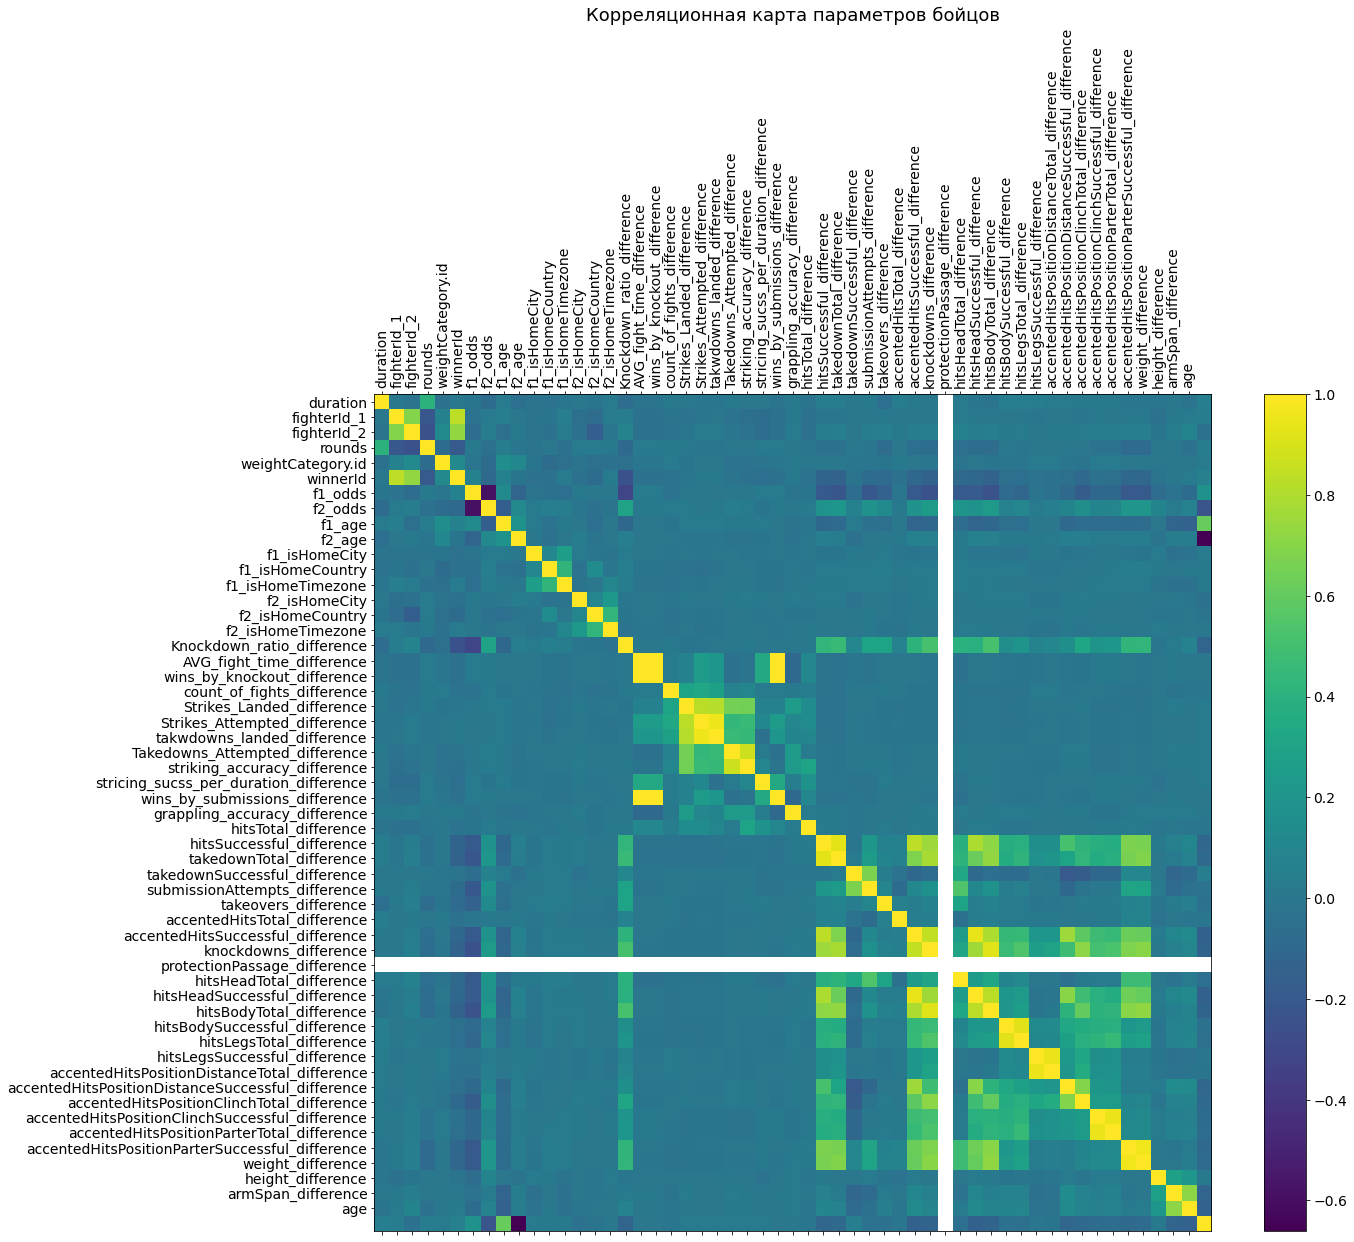

In [188]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Корреляционная карта параметров бойцов', fontsize=18);
# plt.savefig('foo.png')

### Дропаем слишком коррелированные величины

In [189]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

eventDate = df['eventDate.date'] # Данные по дате пропадают, поэтому сохраняем их заранее
df = uncorrelated_factors = trimm_correlated(df, 0.5)

cor_col = df.corr(method='pearson', min_periods=1).dropna(axis=1, how='all').columns.tolist()
df = df[cor_col]
df['eventDate'] = eventDate

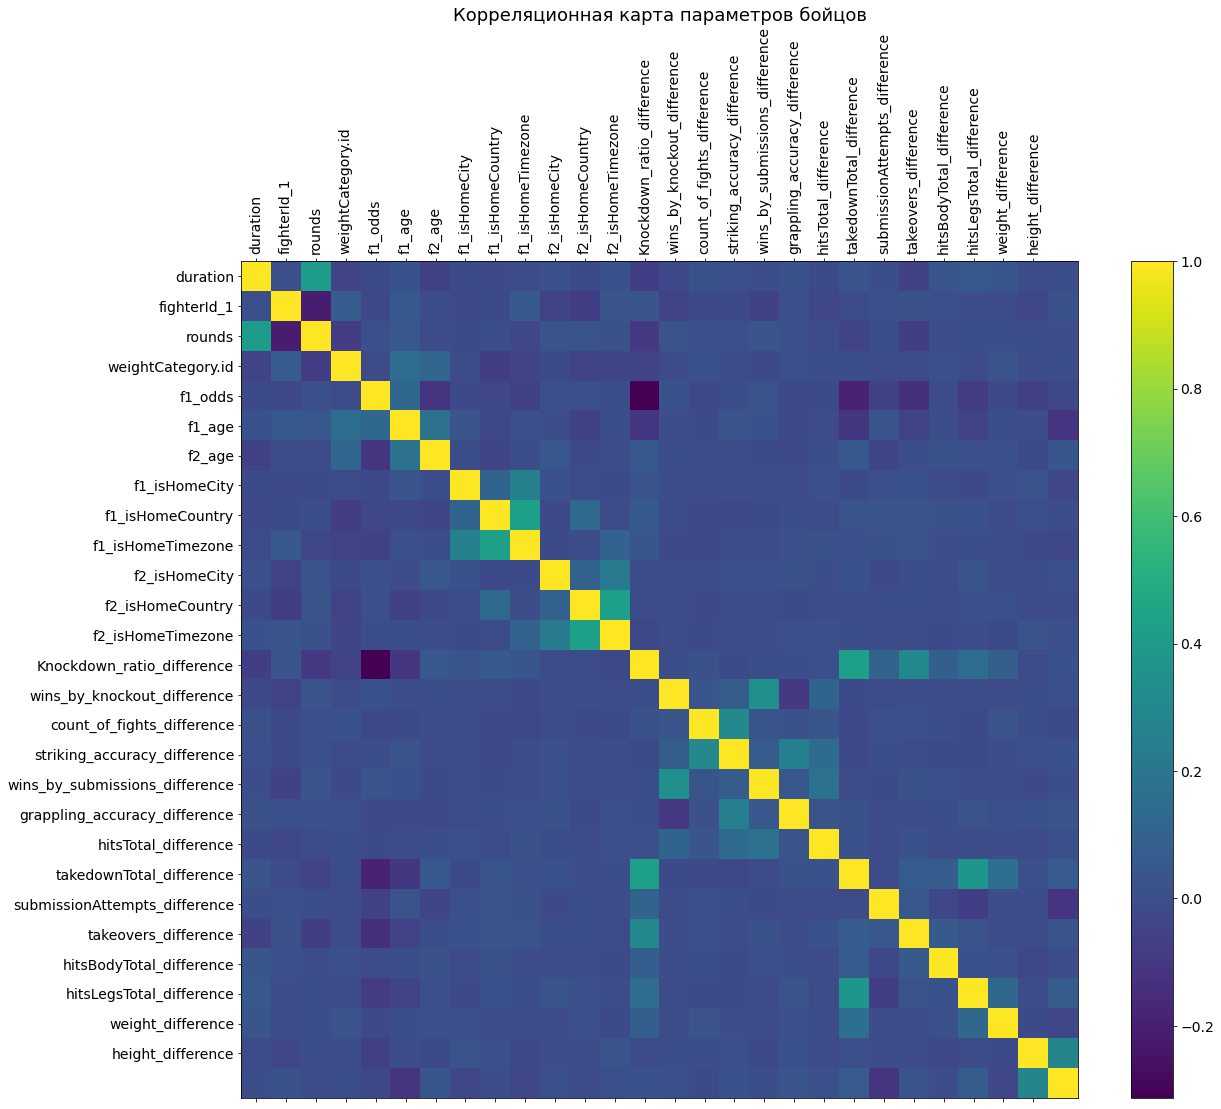

In [190]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Корреляционная карта параметров бойцов', fontsize=18);
# plt.savefig('foo.png')

### Убираем строки, в которых 80 процетов колонок NaN

In [191]:
df.dropna(thresh=round(df.shape[1] * 0.8), inplace=True)

### Избавляемся от лишних колонок в итоговом датафрэйме

In [192]:
df.drop(columns=['fighterId_1', 'weightCategory.id', 'f1_odds'], inplace=True)

### Для упрощения вычислений внутри модели, оставляем один знак после запятой для всех значений датафрэйма

In [193]:
df = df.round(1)

In [194]:
df

,duration,rounds,f1_age,f2_age,f1_isHomeCity,f1_isHomeCountry,f1_isHomeTimezone,f2_isHomeCity,f2_isHomeCountry,f2_isHomeTimezone,winner,Knockdown_ratio_difference,wins_by_knockout_difference,count_of_fights_difference,striking_accuracy_difference,wins_by_submissions_difference,grappling_accuracy_difference,hitsTotal_difference,takedownTotal_difference,submissionAttempts_difference,takeovers_difference,hitsBodyTotal_difference,hitsLegsTotal_difference,weight_difference,height_difference,eventDate
id,,,,,,,,,,,,,,,,,,,,,,,,,,
5201,104.0,1.0,27.0,34.0,0,0,0,0,0,0,True,3.0,0.0,-1.0,0.0,1.0,0.0,4.0,3.0,1.0,0.0,0.0,1.0,-18.6,-10.2,1993-11-12
5202,52.0,1.0,24.0,23.0,0,1,0,0,1,0,True,0.0,17.0,0.0,0.0,-2.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,2.3,-7.6,1993-11-12
5203,59.0,1.0,23.0,34.0,0,1,0,0,0,0,False,0.0,-1.0,2.0,0.0,0.0,0.0,-14.0,0.0,0.0,0.0,0.0,-2.0,26.8,-2.5,1993-11-12
5204,57.0,1.0,29.0,27.0,0,1,0,0,0,0,False,-1.0,-2.0,-5.0,0.0,0.0,0.0,-12.0,0.0,-1.0,-1.0,0.0,0.0,13.6,0.0,1993-11-12
5205,138.0,1.0,27.0,30.0,0,0,0,0,1,0,True,0.0,-1.0,0.0,0.0,-1.0,0.0,7.0,1.0,0.0,0.0,0.0,2.0,-9.5,0.0,1993-11-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40497,300.0,3.0,29.0,26.0,0,1,0,0,0,0,False,NaN,NaN,NaN,NaN,NaN,NaN,-8.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,2021-02-27
40498,158.0,3.0,29.0,32.0,0,0,0,0,0,0,True,NaN,NaN,NaN,NaN,NaN,NaN,86.0,1.0,0.0,2.0,3.0,1.0,-4.5,5.1,2021-02-27
40500,300.0,3.0,33.0,37.0,0,1,0,0,0,0,True,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,0.0,0.0,0.0,-1.0,-1.0,-9.1,2.5,2021-02-27


### Полностью убираем пустые строки

In [195]:
df.dropna(inplace=True, axis=0)

### Конвертируем готовые данные в pickle формат

In [196]:
df.to_pickle("processed_data2.pkl")

In [197]:
df.shape

(6285, 26)

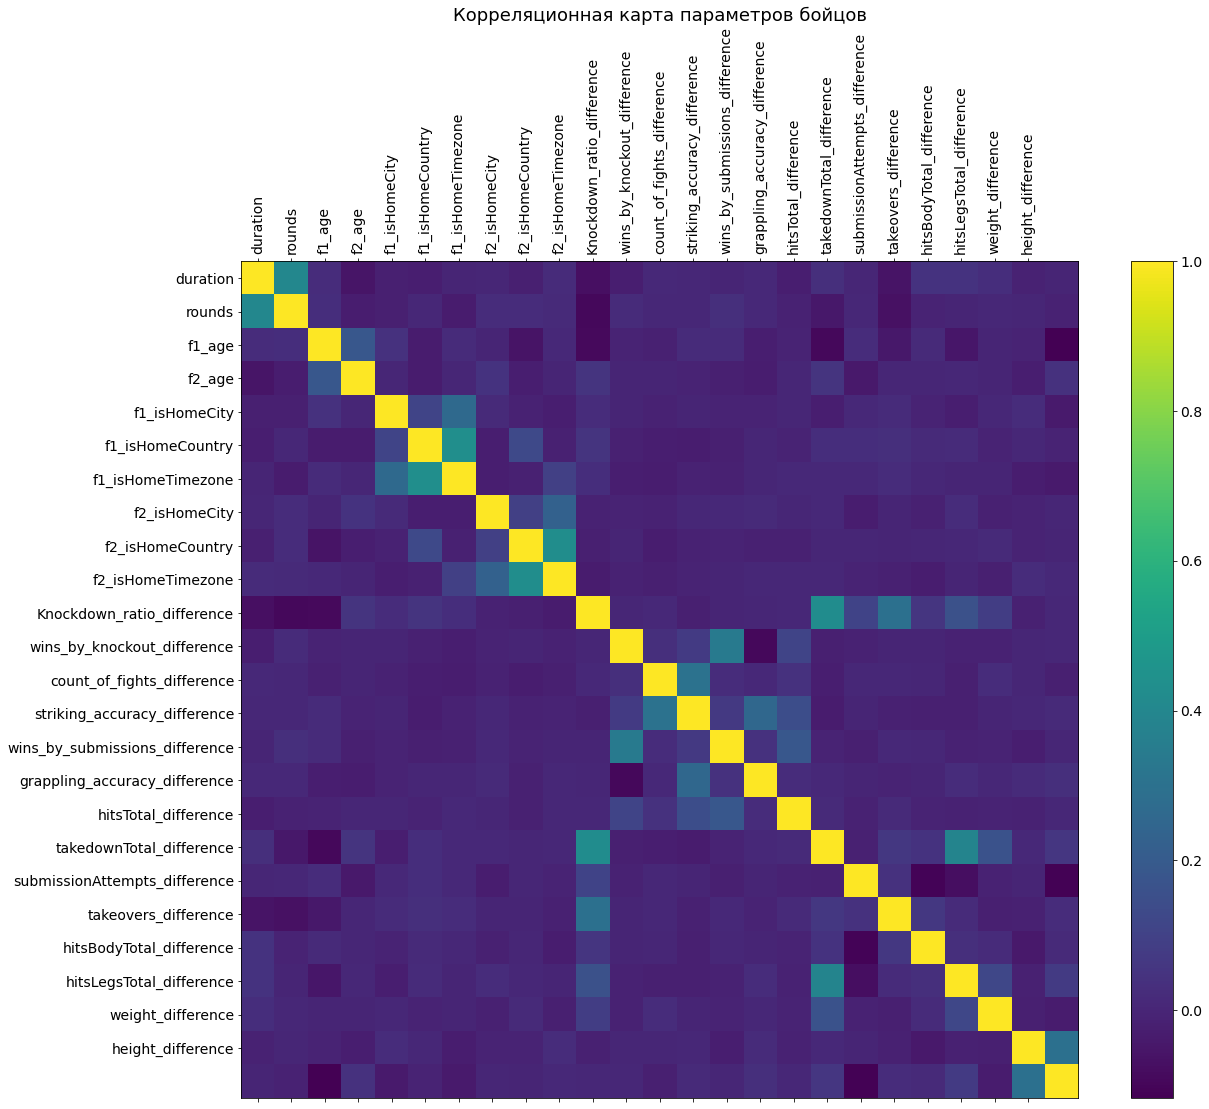

In [198]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Корреляционная карта параметров бойцов', fontsize=18);
# plt.savefig('foo.png')